<a href="https://colab.research.google.com/github/OksIvanchik/HSE_CL/blob/main/CL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Sentiment Analysis to determine whether information about Russia  from BBC News  is postive, negative or neutral*

In [ ]:
import pandas as pd

# 2022
df = pd.read_csv('bbc_17_23.csv')
print(df.head(2).T)

                                                             0  \
title        Ukraine: Angry Zelensky vows to punish Russian...   
pubDate                          Mon, 07 Mar 2022 08:01:56 GMT   
guid          https://www.bbc.co.uk/news/world-europe-60638042   
link         https://www.bbc.co.uk/news/world-europe-606380...   
description  The Ukrainian president says the country will ...   

                                                             1  
title        War in Ukraine: Taking cover in a town under a...  
pubDate                          Sun, 06 Mar 2022 22:49:58 GMT  
guid          https://www.bbc.co.uk/news/world-europe-60641873  
link         https://www.bbc.co.uk/news/world-europe-606418...  
description  Jeremy Bowen was on the frontline in Irpin, as...  


In [ ]:
# convert every string in pubDate column to datetime value 
df['pubDate'] = pd.to_datetime(df['pubDate'])

# print(df['pubDate'])

# apply lambda function to every string in pubDate column
# to extract year and assign it to the column Year
df['Year'] = df['pubDate'].dt.date.apply(lambda x: x.year)

# group by year and count the number of records
df.groupby(by = 'Year').count()

,title,pubDate,guid,link,description
Year,,,,,
2017,1,1,1,1,1
2019,1,1,1,1,1
2021,4,4,4,4,4
2022,12298,12298,12298,12298,12298
2023,2349,2349,2349,2349,2349


In [ ]:
#2010

# expecting string format
df2 = pd.read_json('bbc_10_12.json', orient = 'records')
# print(df2)

df2['news_post_date'] = pd.to_datetime(df2['news_post_date'])
# print(df2['news_post_date'])

df2['Year'] = df2['news_post_date'].dt.date.apply(lambda x: x.year)
# print(df2['Year'])

df2.groupby(by='Year').count().T


Year,2010,2012
tags,15819,6
title,15819,6
news_post_date,15819,6
raw_content,15819,6
content,15819,6
url,15819,6
author,15819,6
language,15819,6
_id,15819,6
region,15819,6


In [ ]:
import matplotlib.pyplot as plt

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

def get_nouns(df, year):
  # get titles corresponding to 'year'
  lines = df['title'][df['Year'] == year].values 

  # get all the lines having word russia/russians
  words = []
  for line in lines:
    if 'russia' in line.lower():
      words += [line.strip('?:- ') for line in line.split()]

  # remove stop words
  clean_words = []
  for word in words:
    word = word.lower()
    if ((word not in STOP_WORDS) and ('russia' not in word) 
        and len(word) and ('maps' not in word)):
      clean_words.append(word)

  # keep only nouns
  nlp = spacy.load("en_core_web_sm")
  nouns = [word for word in clean_words if nlp(word)[0].pos_ == 'NOUN']

  return nouns


def visualise(words):
  text = " ".join(words)
  wordcloud = WordCloud(background_color="white", colormap='PuBuGn').generate(text)
  plt.figure(figsize=(15,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

war          271
invasion      63
gas           30
sanctions     29
round-up      26
oil           24
conflict      22
zelensky      20
city          19
soldiers      16
dtype: int64


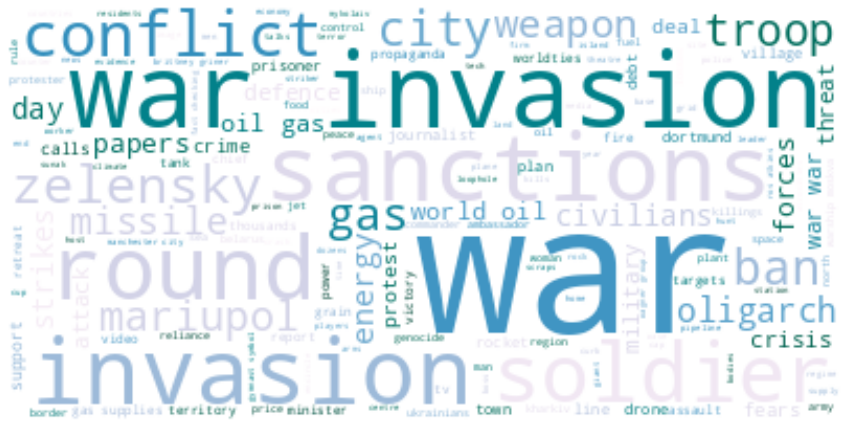

In [ ]:
# 2022
words = get_nouns(df, 2022)
print(pd.Series(words).value_counts().head(10))

visualise(words)

spy        12
belarus     8
gas         7
spies       6
oil         4
pletnev     4
ship        4
court       3
profit      3
cargo       3
dtype: int64


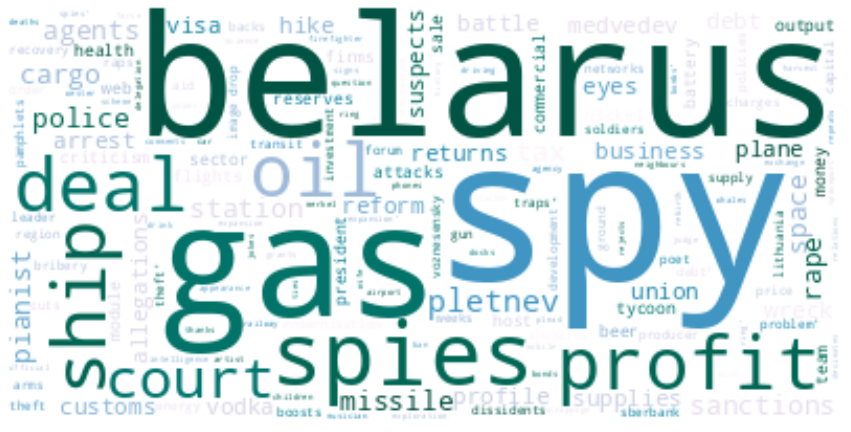

In [ ]:
# 2010
words = get_nouns(df2, 2010)
print(pd.Series(words).value_counts().head(10))

visualise(words)